# Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/cbf0e349ff31d0fbf08a50e232bc42add646b27d/bigdatamart_Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.shape

(8523, 12)

In [4]:
#first five rows of dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Last five rows of dataset
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
#Random rows of dataset
df.sample(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5078,FDD03,13.30,Low Fat,0.079791,Dairy,232.7300,OUT035,2004,Small,Tier 2,Supermarket Type1,2796.3600
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
2485,FDL22,16.85,low fat,0.036596,Snack Foods,90.6488,OUT017,2007,NaN,Tier 2,Supermarket Type1,633.8416
435,DRI13,15.35,Low Fat,0.020310,Soft Drinks,218.0508,OUT013,1987,High,Tier 3,Supermarket Type1,3038.7112
2260,FDN02,16.50,Low Fat,0.073977,Canned,206.8638,OUT045,2002,NaN,Tier 2,Supermarket Type1,2070.6380
5684,NCA41,16.75,Low Fat,0.032637,Health and Hygiene,191.6162,OUT049,1999,Medium,Tier 1,Supermarket Type1,3463.4916
2426,NCP53,14.75,Low Fat,0.032863,Health and Hygiene,238.6906,OUT013,1987,High,Tier 3,Supermarket Type1,4278.4308
5995,FDB32,20.60,Low Fat,0.023586,Fruits and Vegetables,94.7778,OUT017,2007,NaN,Tier 2,Supermarket Type1,1314.2892


In [8]:
#columns in the dataset
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
#brief info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Checking the null Values

In [11]:
#null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

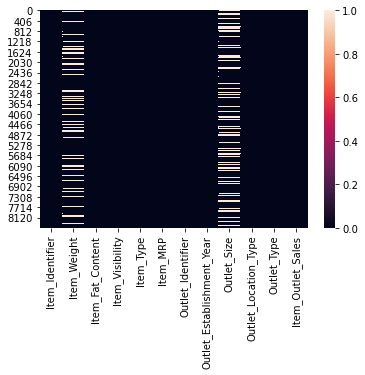

In [12]:
#plotting the null values by using heatmap
sns.heatmap(df.isnull())

In [14]:
#target column value counts
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1230.3984    14
             ..
1883.5482     1
5386.9878     1
4231.8248     1
91.2146       1
3653.9104     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

<AxesSubplot:ylabel='Frequency'>

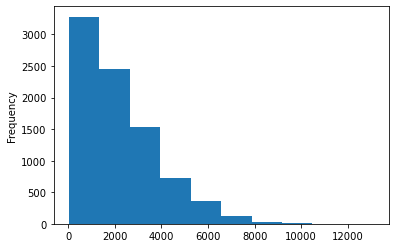

In [15]:
df['Item_Outlet_Sales'].plot.hist()

In [17]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
#filling the null values
df['Outlet_Size'].fillna(('Medium'),inplace=True)
df['Item_Weight']=df['Item_Weight'].fillna(np.mean(df['Item_Weight']))

In [20]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
# this column has different symbols for same thing, so changing into one pattern
df['Item_Fat_Content'].replace('Low Fat','LF',inplace=True)
df['Item_Fat_Content'].replace('Regular','reg',inplace=True)
df['Item_Fat_Content'].replace('low fat','LF',inplace=True)
df['Item_Fat_Content'].value_counts()

LF     5517
reg    3006
Name: Item_Fat_Content, dtype: int64

# Statistical Summary

In [23]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDT07     9
FDW49     9
FDO19     9
         ..
FDT35     1
FDK57     1
FDO33     1
FDY43     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l1=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in l1:
    df[i]=le.fit_transform(df[i].astype(str))

In [27]:
df['Item_Weight']=df['Item_Weight'].astype(int)

# Correlation

In [28]:
corr=df.corr()
corr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.047168,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.047168,1.000000,-0.022138,-0.014975,0.028234,0.025275,-0.006801,0.016347,-0.011796,0.000081,-0.015247,0.009077
Item_Fat_Content,-0.114660,-0.022138,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.014975,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028234,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.025275,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.006801,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,0.016347,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.011796,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.000081,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


<AxesSubplot:>

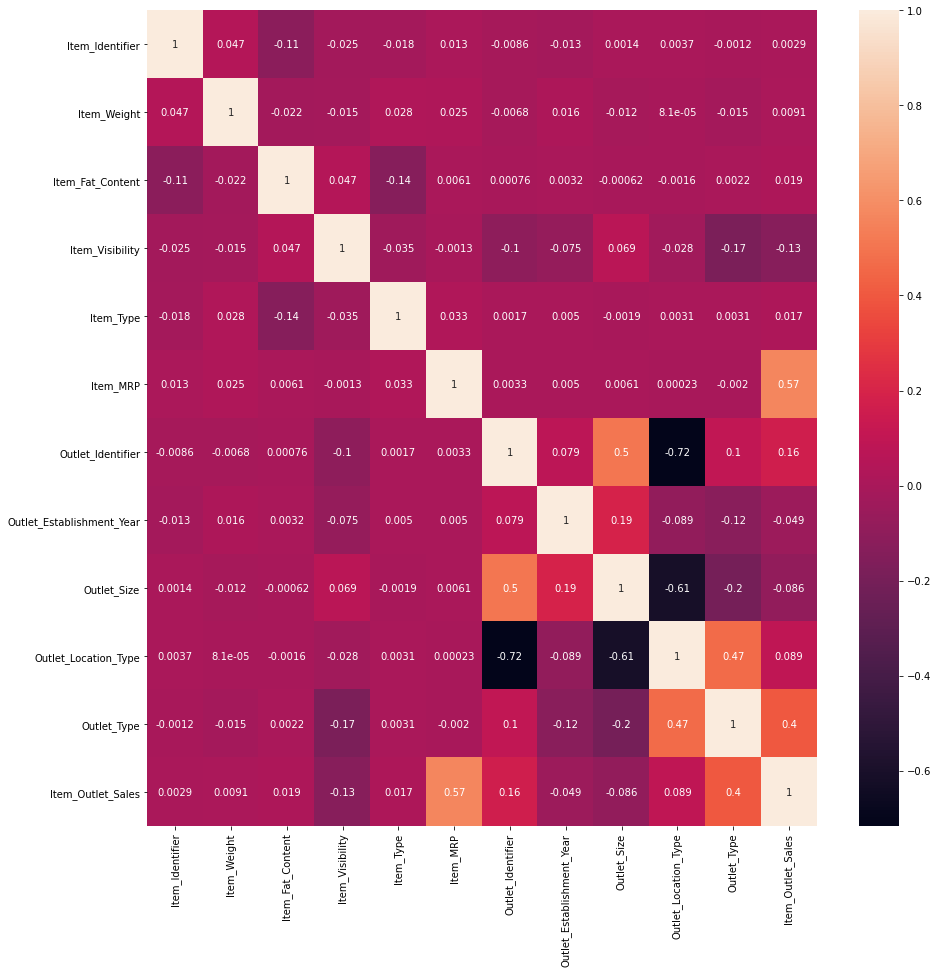

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

In [31]:
corr['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128625
Outlet_Size                 -0.086182
Outlet_Establishment_Year   -0.049135
Item_Identifier              0.002869
Item_Weight                  0.009077
Item_Type                    0.017048
Item_Fat_Content             0.018719
Outlet_Location_Type         0.089367
Outlet_Identifier            0.162325
Outlet_Type                  0.401522
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

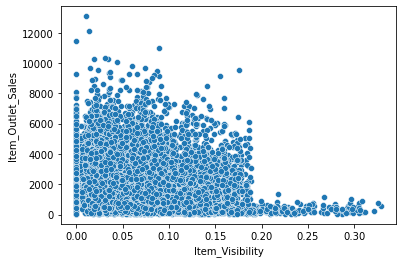

In [32]:
sns.scatterplot(df["Item_Visibility"], df["Item_Outlet_Sales"])

<BarContainer object of 8523 artists>

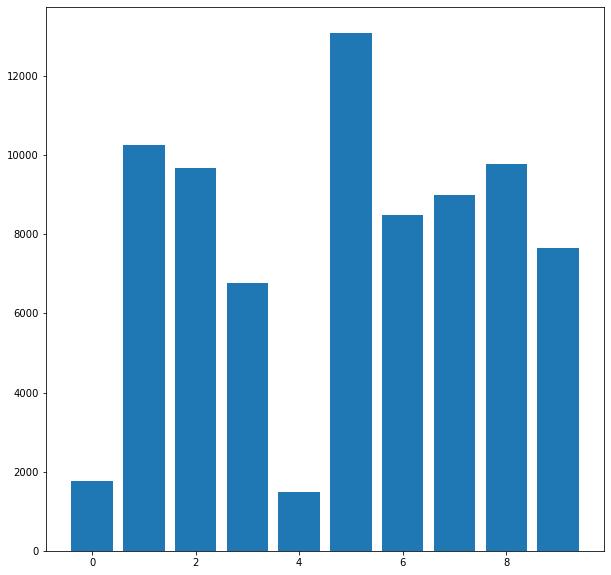

In [33]:
plt.figure(figsize=(10,10))
plt.bar(df["Outlet_Identifier"],df["Item_Outlet_Sales"], width = 0.8)

<BarContainer object of 8523 artists>

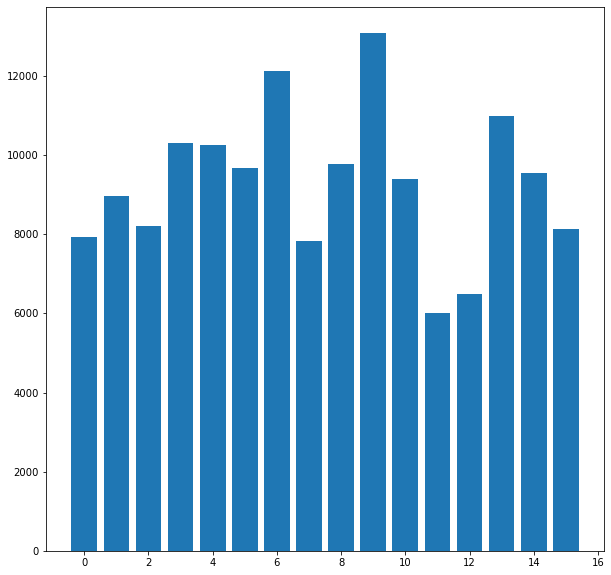

In [34]:
plt.figure(figsize=(10,10))
plt.bar(df["Item_Type"],df["Item_Outlet_Sales"], width = 0.8)

<BarContainer object of 8523 artists>

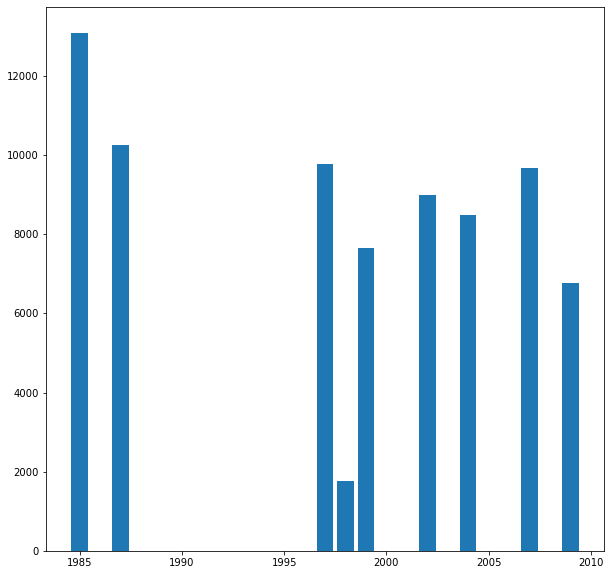

In [35]:
plt.figure(figsize=(10,10))
plt.bar(df["Outlet_Establishment_Year"],df["Item_Outlet_Sales"], width = 0.8)

<BarContainer object of 8523 artists>

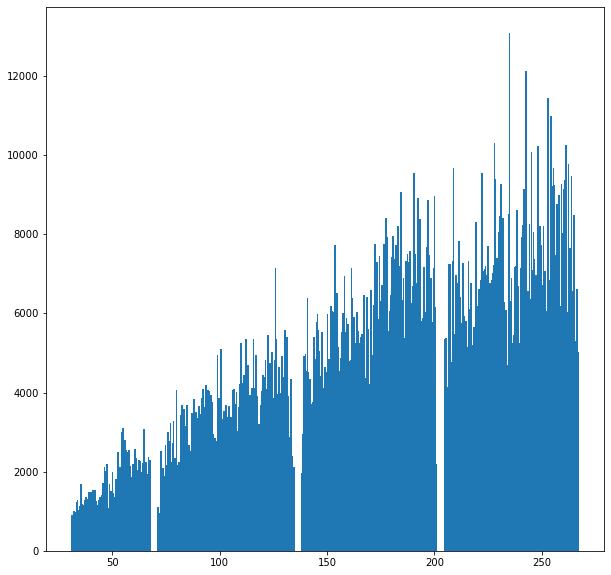

In [36]:
plt.figure(figsize=(10,10))
plt.bar(df["Item_MRP"],df["Item_Outlet_Sales"], width = 0.8)

<BarContainer object of 8523 artists>

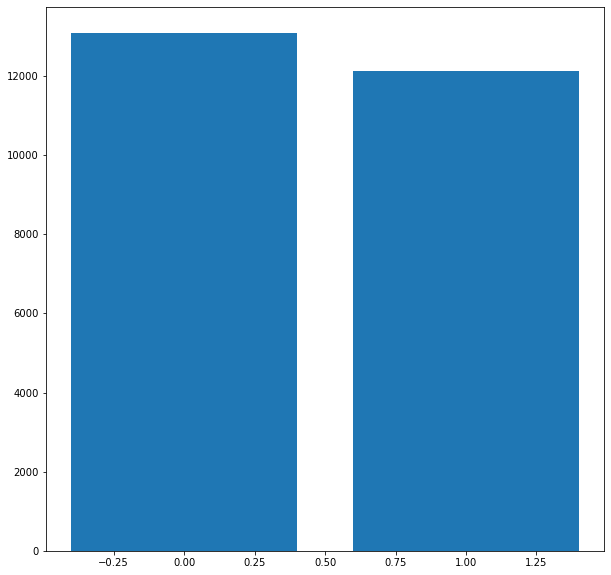

In [37]:
plt.figure(figsize=(10,10))
plt.bar(df["Item_Fat_Content"],df["Item_Outlet_Sales"], width = 0.8)

<BarContainer object of 8523 artists>

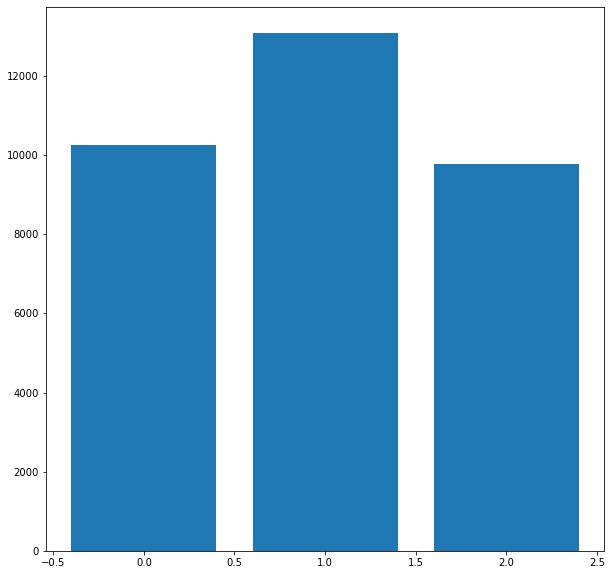

In [38]:
plt.figure(figsize=(10,10))
plt.bar(df["Outlet_Size"],df["Item_Outlet_Sales"], width = 0.8)

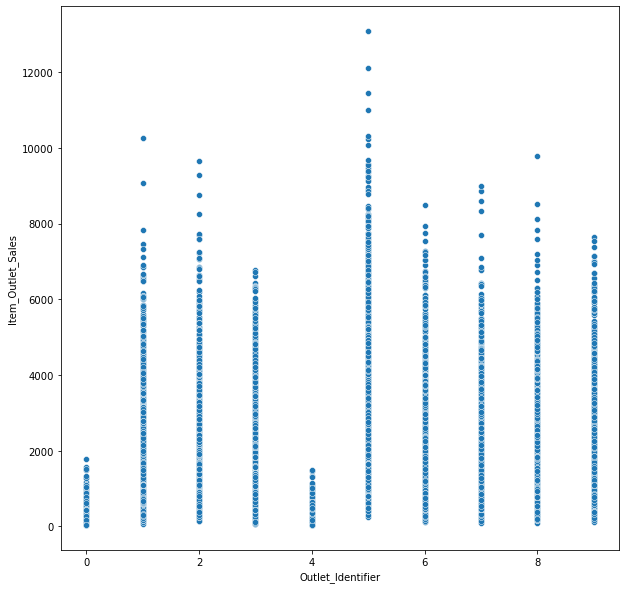

In [39]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', data = df)
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

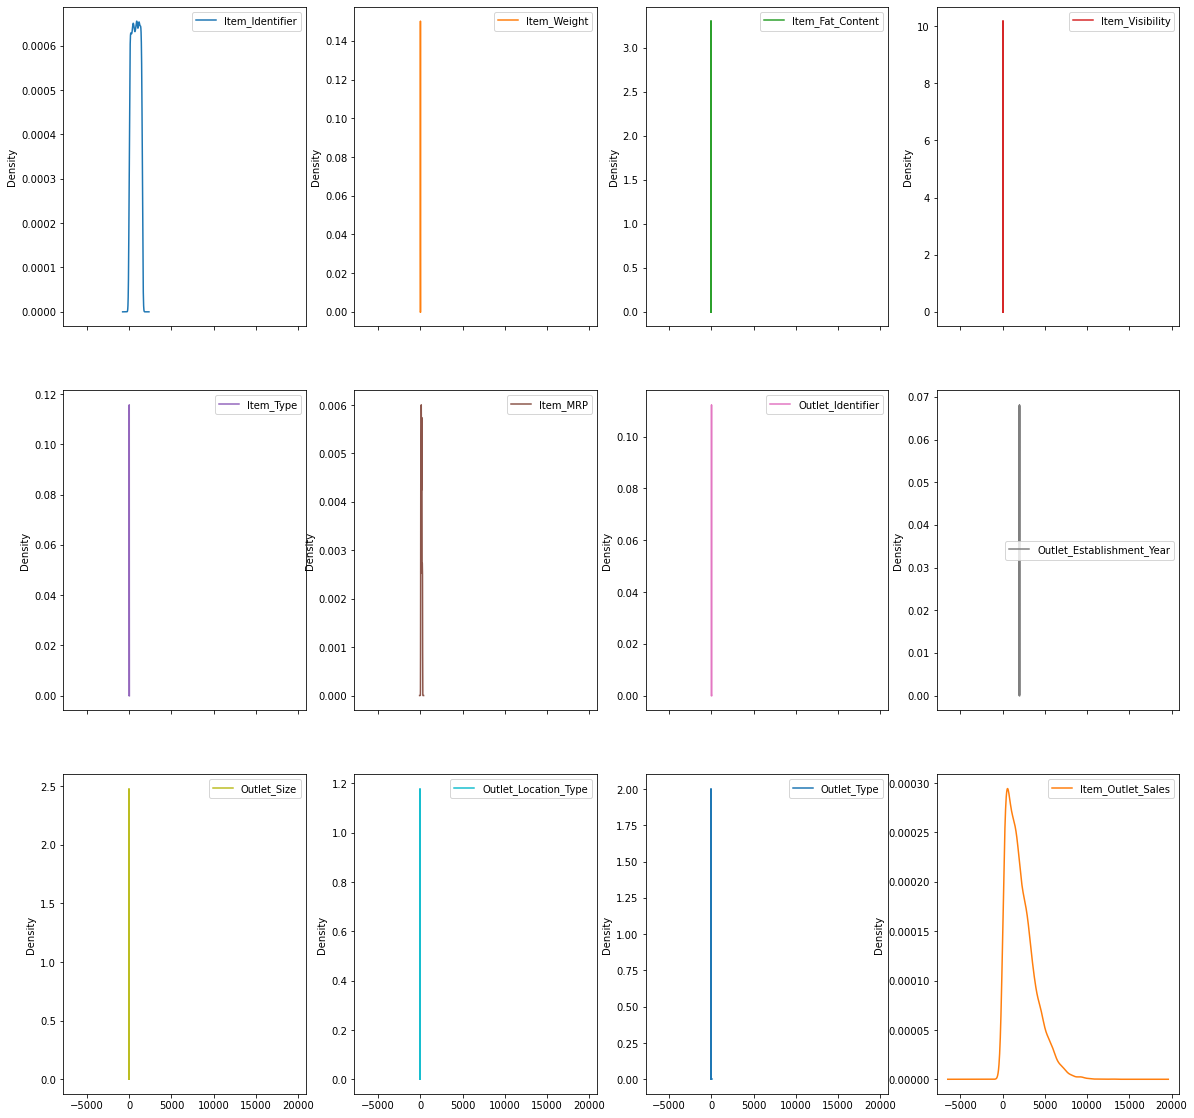

In [40]:
df.plot(kind='kde',subplots=True,layout=(3,4),figsize=(20,20))

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

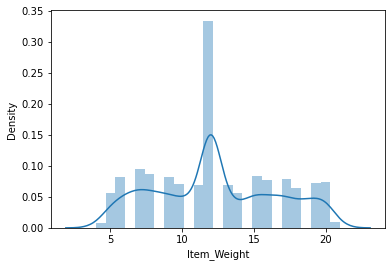

In [41]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

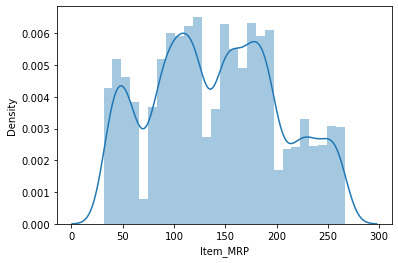

In [42]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

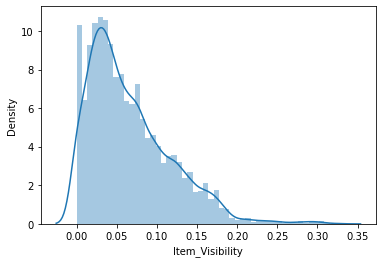

In [43]:
sns.distplot(df['Item_Visibility'])

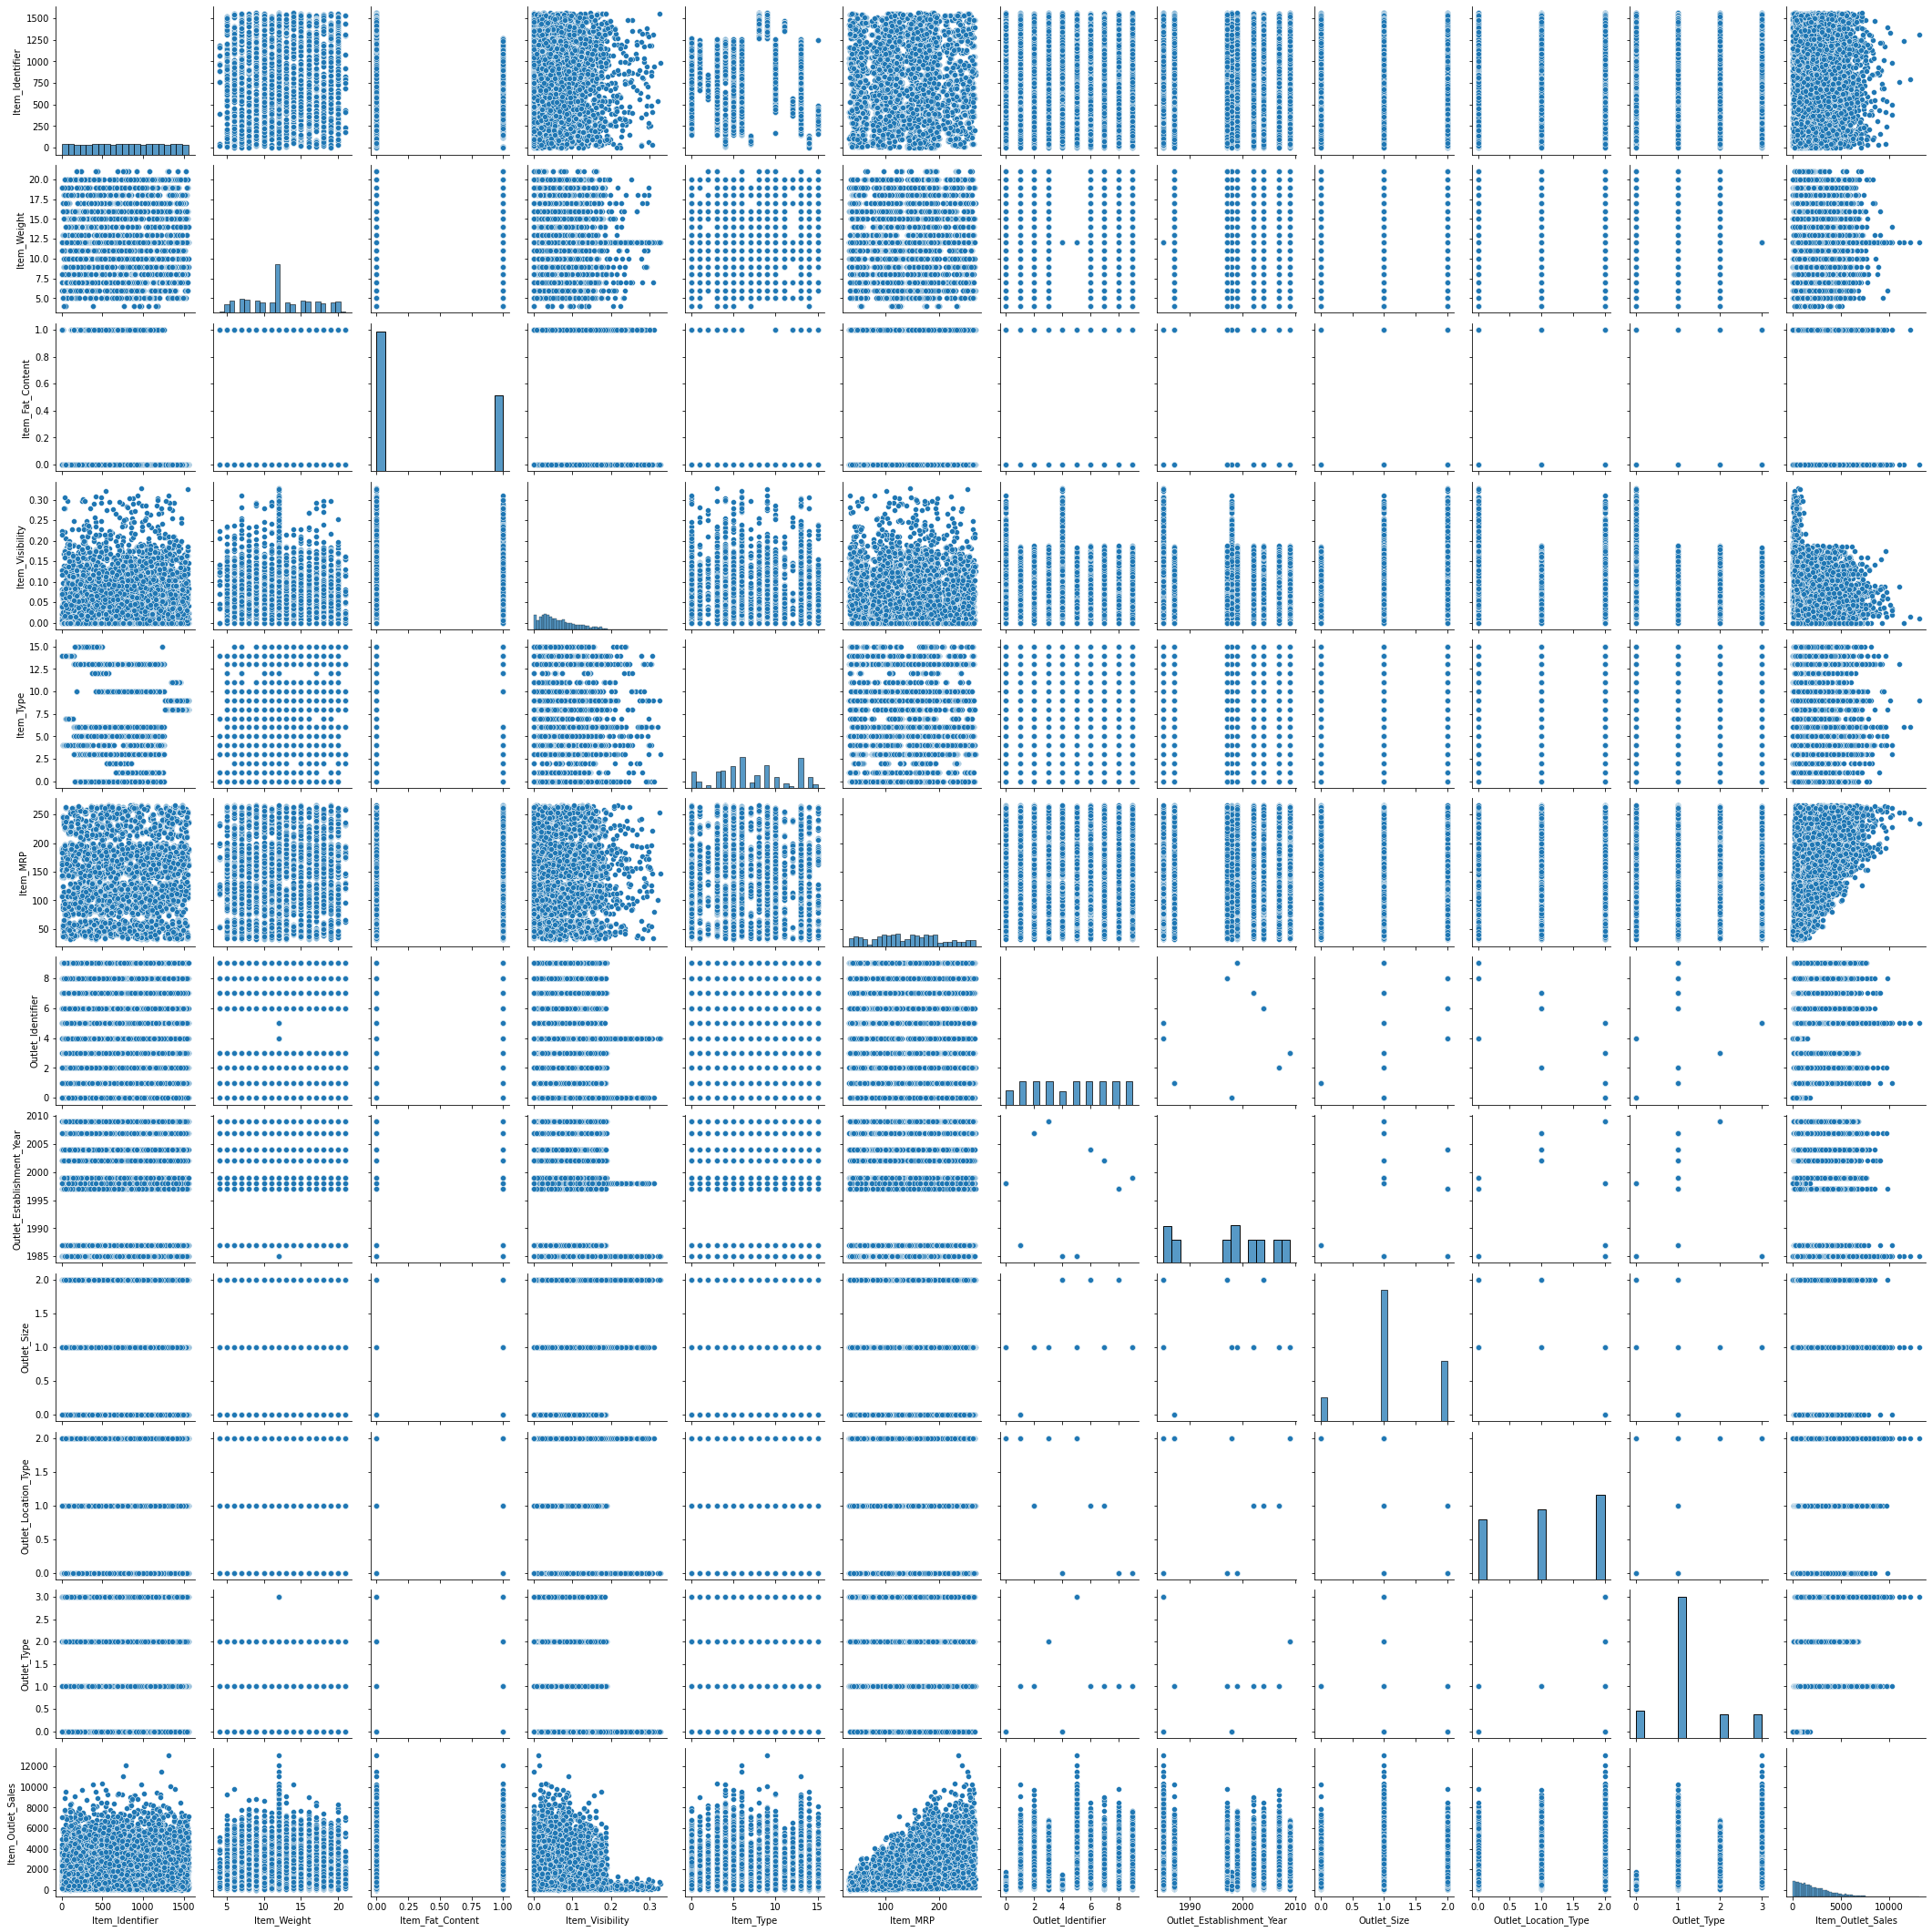

In [44]:
sns.pairplot(df)

In [45]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.123343
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [46]:
# removing the skewness

from sklearn.preprocessing import power_transform
df_new=power_transform(df)
df=pd.DataFrame(df_new,columns=df.columns)
df.skew()

Item_Identifier             -0.293700
Item_Weight                 -0.065965
Item_Fat_Content             0.616705
Item_Visibility              0.124279
Item_Type                   -0.164574
Item_MRP                    -0.115386
Outlet_Identifier           -0.213935
Outlet_Establishment_Year   -0.200959
Outlet_Size                 -0.042980
Outlet_Location_Type        -0.220632
Outlet_Type                  0.007863
Item_Outlet_Sales           -0.074791
dtype: float64

Item_Identifier                  AxesSubplot(0.125,0.71587;0.227941x0.16413)
Item_Weight                   AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Item_Fat_Content              AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Item_Visibility                 AxesSubplot(0.125,0.518913;0.227941x0.16413)
Item_Type                    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Item_MRP                     AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Outlet_Identifier               AxesSubplot(0.125,0.321957;0.227941x0.16413)
Outlet_Establishment_Year    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Outlet_Size                  AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Outlet_Location_Type               AxesSubplot(0.125,0.125;0.227941x0.16413)
Outlet_Type                     AxesSubplot(0.398529,0.125;0.227941x0.16413)
Item_Outlet_Sales               AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

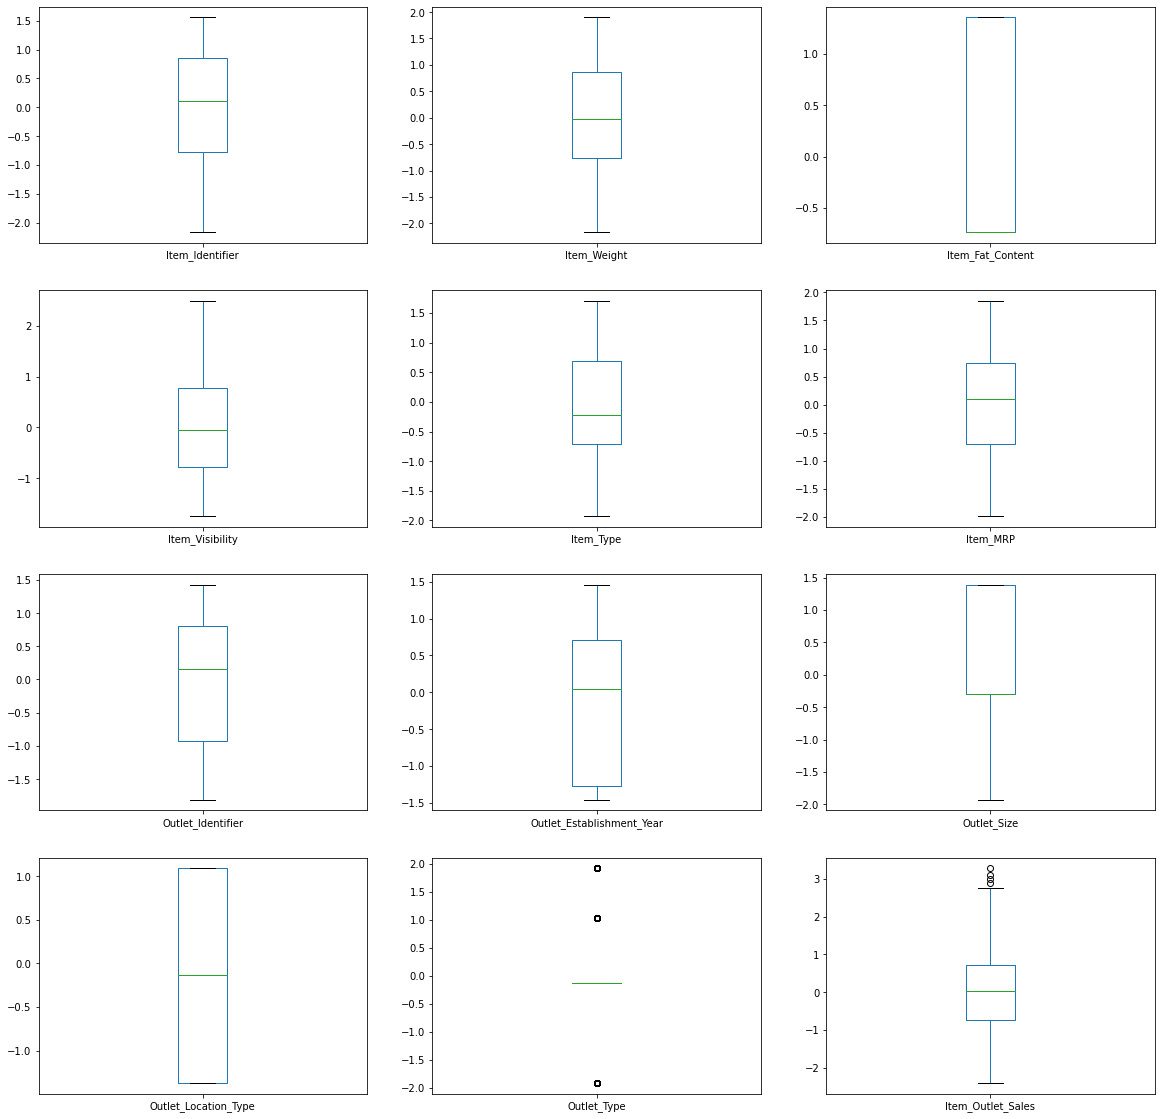

In [47]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(20,20))

In [48]:
#removing the outliers from the data

from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([5223, 7188], dtype=int64), array([11, 11], dtype=int64))


(8521, 12)

In [49]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [50]:
y

0       0.985078
1      -1.218135
2       0.220360
3      -0.835183
4      -0.566616
          ...   
8518    0.573946
8519   -1.062855
8520   -0.393044
8521    0.070669
8522   -0.797934
Name: Item_Outlet_Sales, Length: 8521, dtype: float64

In [51]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.46083105, -0.75528417, -0.73809134, ..., -0.29333255,
        -1.37361709, -0.12307534],
       [-2.09362357, -1.85838228,  1.35484587, ..., -0.29333255,
         1.0886035 ,  1.04137225],
       [-0.15386668,  1.08422041, -0.73809134, ..., -0.29333255,
        -1.37361709, -0.12307534],
       ...,
       [ 1.20616632, -0.50412697, -0.73809134, ...,  1.39047603,
        -0.13086064, -0.12307534],
       [-0.11240903, -1.28399058,  1.35484587, ..., -0.29333255,
         1.0886035 ,  1.04137225],
       [-1.86223181,  0.4341149 , -0.73809134, ...,  1.39047603,
        -1.37361709, -0.12307534]])

# Importing Different Libraries

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [53]:
#defining the diffferent libraries

lg=LinearRegression()
rdr=RandomForestRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

In [54]:
model=[lg,rdr,svr,dtr,knr]
maxAcc=0
maxRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is', maxAcc , 'on random state', maxRS)

Best Accuracy score is 0.6323913407678554 on random state 58


x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=58,test_size=.30)


In [55]:
x_train.shape

(5964, 11)

# Linear Regression

In [56]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=r2_score(y_test,pred1)
print('Accuracy Score: ',acc)

Accuracy Score:  0.6138319895769764


# Decision Tree Regressor

In [57]:
dtr.fit(x_train,y_train)
pred2=dtr.predict(x_test)
acc=r2_score(y_test,pred2)
print('Accuracy Score: ',acc)

Accuracy Score:  0.36728945260776924


# Support Vector Regressor

In [58]:
svr.fit(x_train,y_train)
pred3=svr.predict(x_test)
acc=r2_score(y_test,pred3)
print('Accuracy Score: ',acc)

Accuracy Score:  0.6849373630733836


# Random Forest Regressor

In [59]:
rdr.fit(x_train,y_train)
pred4=rdr.predict(x_test)
acc=r2_score(y_test,pred4)
print('Accuracy Score: ',acc)

Accuracy Score:  0.6589947965843257


# KNeighbors Regressors

In [60]:
knr.fit(x_train,y_train)
pred5=knr.predict(x_test)
acc=r2_score(y_test,pred5)
print('Accuracy Score: ',acc)

Accuracy Score:  0.629729795303573


# Cross Val Score

In [61]:
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cr=cross_val_score(svr,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  67.6795623099524
at cv=  3
cross val score =  68.43544589883275
at cv=  4
cross val score =  68.28296444751498
at cv=  5
cross val score =  68.21875109844625
at cv=  6
cross val score =  68.50166659281997
at cv=  7
cross val score =  68.52974534537181


In [62]:
from sklearn.model_selection import GridSearchCV
# creating parameters
para={'kernel':['linear', 'poly', 'rbf'],'gamma':['scale','auto']}

GCV=GridSearchCV(svr,para,cv=7,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

In [63]:
GCV_pred=GCV.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.6091310682794496

In [64]:
import pickle
filename='BigMart_.pkl'
pickle.dump(svr, open(filename,'wb'))

In [65]:
ds=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
ds.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [66]:
loaded_model = pickle.load(open(filename, 'rb'))

In [67]:
pred=loaded_model.predict(ds)

ValueError: could not convert string to float: 'FDW58'